# Backward diffusion

https://en.wikipedia.org/wiki/Diffusion_model

[*********************100%***********************]  1 of 1 completed


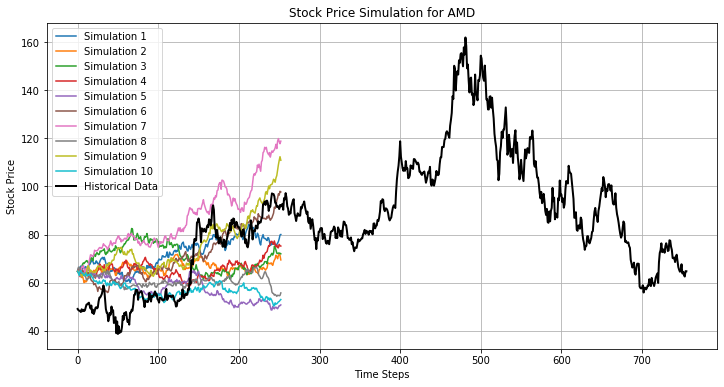

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Backward Diffusion Function
def backward_diffusion(data, dt, drift, volatility, n_simulations, n_steps):
    simulations = np.empty((n_simulations, n_steps + 1))
    simulations[:, 0] = data[-1]

    for i in range(1, n_steps + 1):
        z = np.random.normal(size=n_simulations)
        delta_t = dt
        simulations[:, i] = simulations[:, i - 1] * np.exp((drift - 0.5 * volatility**2) * delta_t + volatility * np.sqrt(delta_t) * z)

    return simulations

# Parameters
n_simulations = 10
n_steps = 252  # Assuming daily data for 1 year
dt = 1 / 252  # Daily time step

# Stock parameters (you can change these values)
drift = 0.1  # Drift rate
volatility = 0.2  # Volatility

# Perform backward diffusion simulations
simulations = backward_diffusion(data, dt, drift, volatility, n_simulations, n_steps)

# Plot the simulations
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulations[i], label=f"Simulation {i + 1}")
plt.plot(data, label='Historical Data', color='black', linewidth=2)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.title(f'Stock Price Simulation for {symbol}')
plt.grid(True)
plt.show()